In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm
import os
%matplotlib inline

In [91]:
df=pd.read_csv("C:/Users/RAHUL/Desktop/dsba/Module 3/SalaryData.csv")

In [92]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [93]:
df.columns

Index(['Education', 'Occupation', 'Salary'], dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [95]:
df.describe()

,Salary
count,40.000000
mean,162186.875000
std,64860.407506
min,50103.000000
25%,99897.500000
50%,169100.000000
75%,214440.750000
max,260151.000000


In [96]:
df.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

In [97]:
## Question 2
formula='Salary~Education'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

## Since P value is less than 0.05 we accept the null hypothesis 

             df        sum_sq       mean_sq         F        PR(>F)
Education   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual   37.0  6.137256e+10  1.658718e+09       NaN           NaN


In [98]:
aov_table['mean_sq']

Education    5.134773e+10
Residual     1.658718e+09
Name: mean_sq, dtype: float64

In [99]:
## Question 3
formula='Salary~Occupation'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

## Since the P value is greater 0.05 we accept the null hypothesis 

              df        sum_sq       mean_sq         F    PR(>F)
Occupation   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual    36.0  1.528092e+11  4.244701e+09       NaN       NaN


In [100]:
## Question 4
## If the null hypothesis is rejected in either 1.2 or in 1.3, find out which class means are significantly different.Interpret the result.

In [101]:
aov_table['mean_sq']

Occupation    3.752928e+09
Residual      4.244701e+09
Name: mean_sq, dtype: float64

As the mean square is different between occupation and education , the mean square of education is the higher compared to occupation.

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

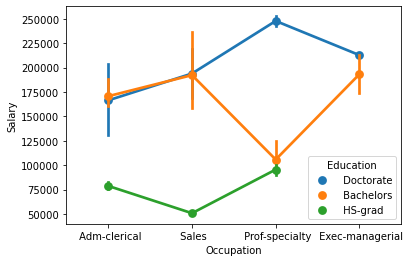

In [102]:
##1B Question 1
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education')

In [103]:
##1B  Question 2 
formula='Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


Ho: There is no interaction between Education and Occupation on Salary

H1: There is some interaction between Education and Occupation on Salary

Since the P value is less than 0.05 , we reject the null hypothesis. There is some interaction between education and Occupation on salary .

<AxesSubplot:xlabel='Occupation', ylabel='Salary'>

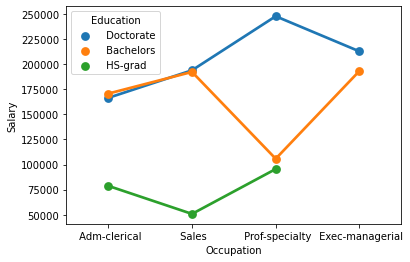

In [104]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None)

In [105]:
## Question 3

After the ANOVA test we can conclude that Salary is slightly dependent on both Education and Salary . We cannot conclude that salary is not only dependent on one parameter ( education or occupation ) but dependent on both .

In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels import multivariate

In [107]:
df1=pd.read_csv("C:/Users/RAHUL/Desktop/dsba/Module 3/Education+-+Post+12th+Standard.csv")
df1

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [108]:
df1.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [109]:
df1.info

<bound method DataFrame.info of                               Names   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52    

In [110]:
df1.describe

<bound method NDFrame.describe of                               Names   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52  

In [111]:
df1.shape

(777, 18)

In [112]:
dup=df1.duplicated()
print('Number of duplicate rows = %d' %(dup.sum()))
df1[dup]

Number of duplicate rows = 0


,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


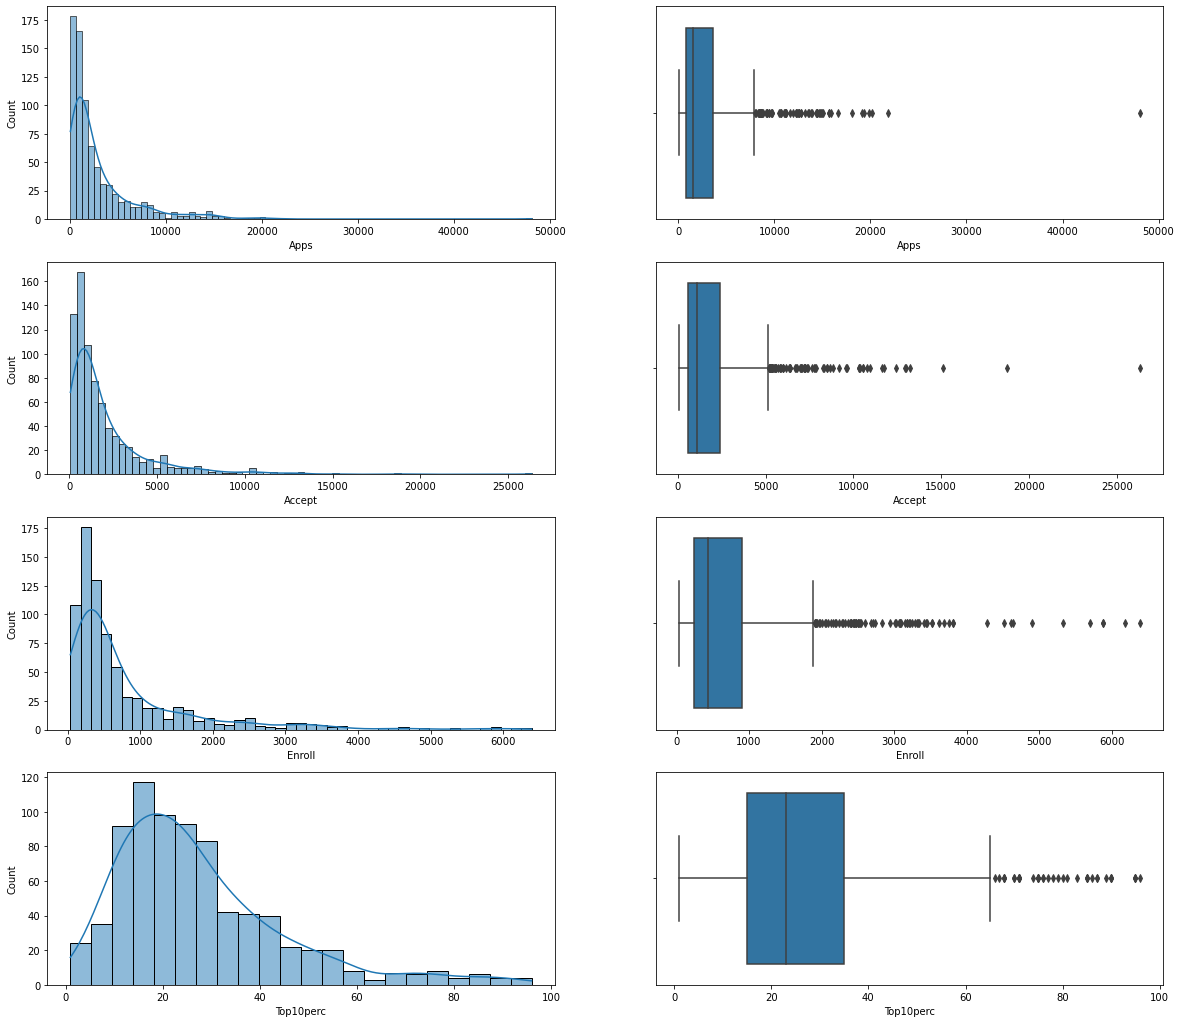

In [113]:
## Question 1
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.histplot(df1['Apps'], kde=True, ax=axes[0][0])
sns.boxplot(x='Apps', data=df1, ax=axes[0][1])
sns.histplot(df1['Accept'], kde=True, ax=axes[1][0])
sns.boxplot(x='Accept', data=df1, ax=axes[1][1])
sns.histplot(df1['Enroll'], kde=True, ax=axes[2][0])
sns.boxplot(x='Enroll', data=df1, ax=axes[2][1])
sns.histplot(df1['Top10perc'], kde=True, ax=axes[3][0])
sns.boxplot(x='Top10perc', data=df1, ax=axes[3][1])
plt.show()

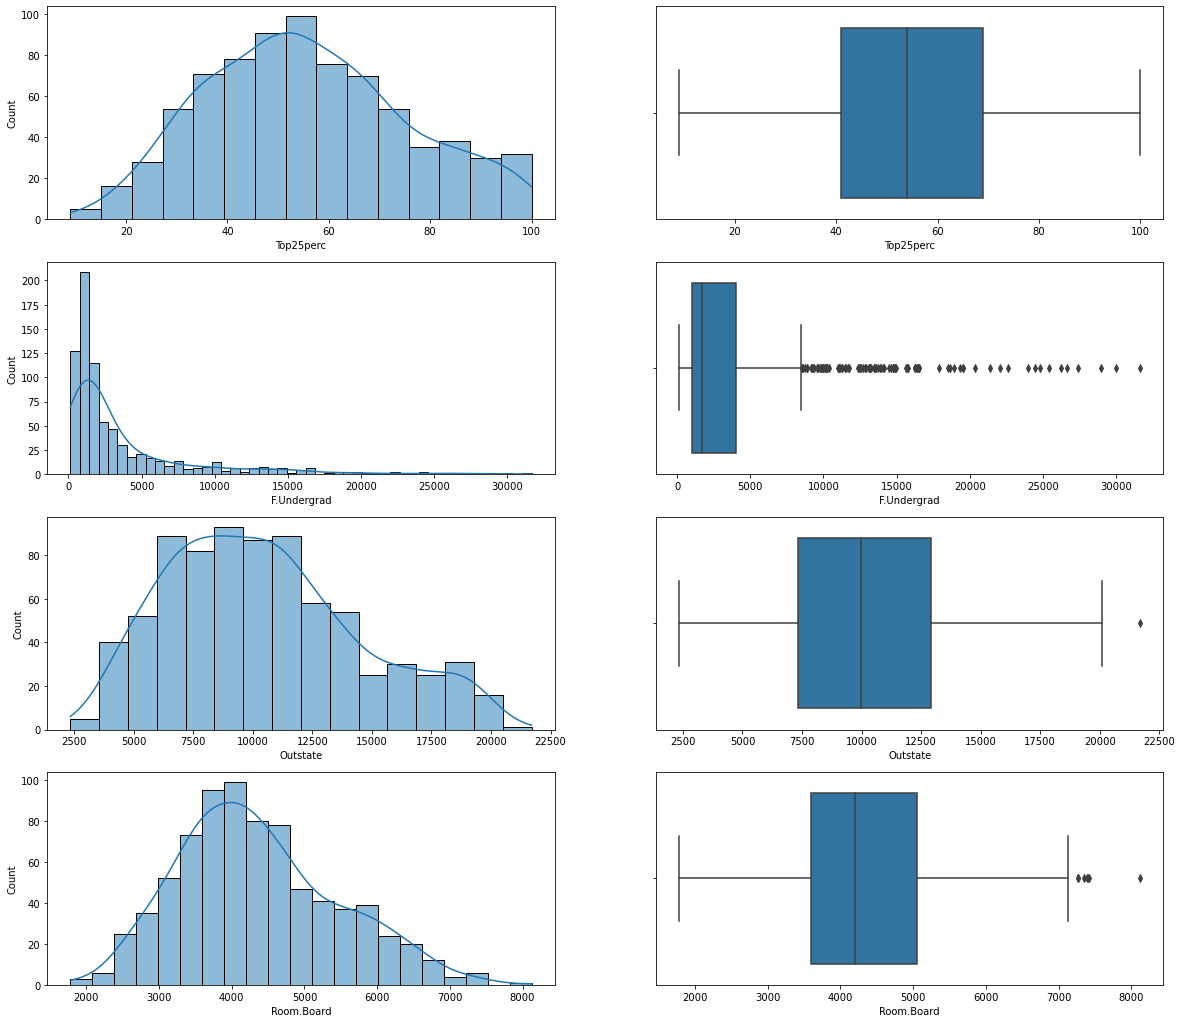

In [114]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.histplot(df1['Top25perc'], kde=True, ax=axes[0][0])
sns.boxplot(x='Top25perc', data=df1, ax=axes[0][1])
sns.histplot(df1['F.Undergrad'], kde=True, ax=axes[1][0])
sns.boxplot(x='F.Undergrad', data=df1, ax=axes[1][1])
sns.histplot(df1['Outstate'], kde=True, ax=axes[2][0])
sns.boxplot(x='Outstate', data=df1, ax=axes[2][1])
sns.histplot(df1['Room.Board'], kde=True, ax=axes[3][0])
sns.boxplot(x='Room.Board', data=df1, ax=axes[3][1])
plt.show()

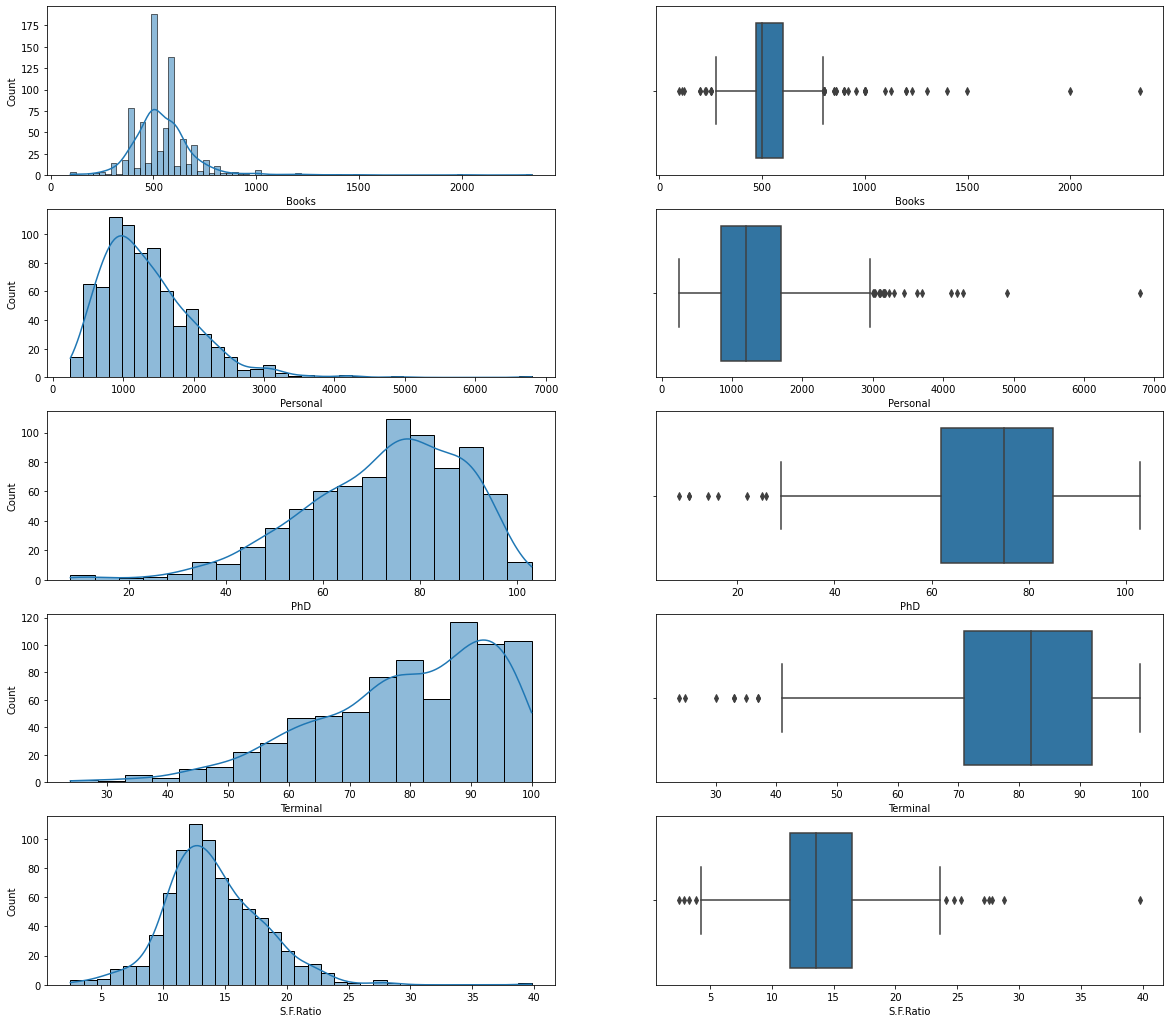

In [115]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20,18)
sns.histplot(df1['Books'], kde=True, ax=axes[0][0])
sns.boxplot(x='Books', data=df1, ax=axes[0][1])
sns.histplot(df1['Personal'], kde=True, ax=axes[1][0])
sns.boxplot(x='Personal', data=df1, ax=axes[1][1])
sns.histplot(df1['PhD'], kde=True, ax=axes[2][0])
sns.boxplot(x='PhD', data=df1, ax=axes[2][1])
sns.histplot(df1['Terminal'], kde=True, ax=axes[3][0])
sns.boxplot(x='Terminal', data=df1, ax=axes[3][1])
sns.histplot(df1['S.F.Ratio'], kde=True, ax=axes[4][0])
sns.boxplot(x='S.F.Ratio', data=df1, ax=axes[4][1])
plt.show()

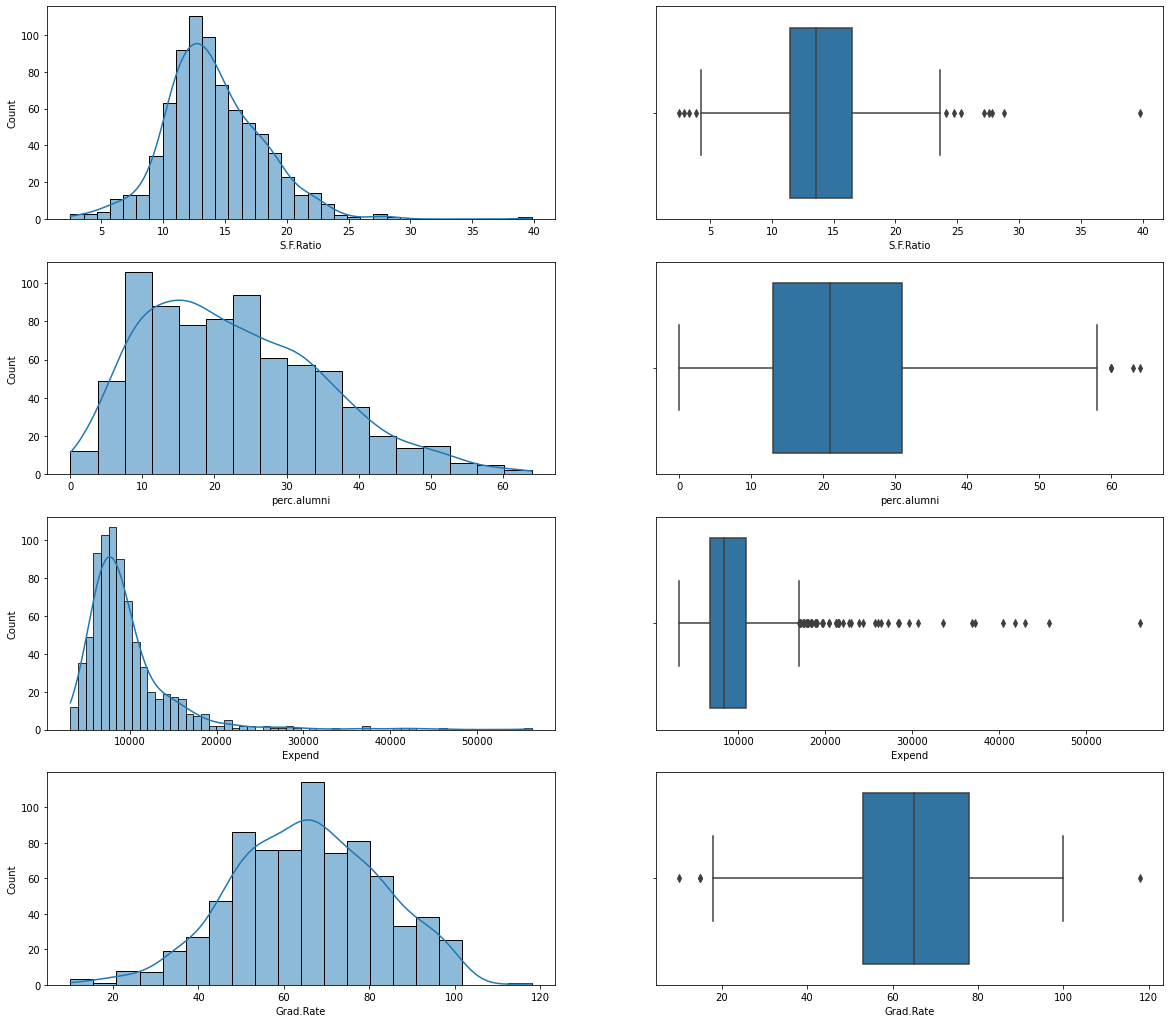

In [116]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,18)
sns.histplot(df1['S.F.Ratio'], kde=True, ax=axes[0][0])
sns.boxplot(x='S.F.Ratio', data=df1, ax=axes[0][1])
sns.histplot(df1['perc.alumni'], kde=True, ax=axes[1][0])
sns.boxplot(x='perc.alumni', data=df1, ax=axes[1][1])
sns.histplot(df1['Expend'], kde=True, ax=axes[2][0])
sns.boxplot(x='Expend', data=df1, ax=axes[2][1])
sns.histplot(df1['Grad.Rate'], kde=True, ax=axes[3][0])
sns.boxplot(x='Grad.Rate', data=df1, ax=axes[3][1])
plt.show()

In [117]:
df1.skew(axis=0, skipna=True)

Apps           3.723750
Accept         3.417727
Enroll         2.690465
Top10perc      1.413217
Top25perc      0.259340
F.Undergrad    2.610458
P.Undergrad    5.692353
Outstate       0.509278
Room.Board     0.477356
Books          3.485025
Personal       1.742497
PhD           -0.768170
Terminal      -0.816542
S.F.Ratio      0.667435
perc.alumni    0.606891
Expend         3.459322
Grad.Rate     -0.113777
dtype: float64

In [118]:
df1.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


In [119]:
## Question 2
## Yes it's far vital to do scaling for PCA on this case.

## Often the variables of the information set are of various scales i.e. one variable is in tens of thousands and thousands and different in handiest 100. For eg. in our information set many variables are having values in hundreds and in different simply  digits. Since the information in those variables are of various scales , it's far hard to compare those variables. We are doing this for the numerical variables.

## Since scaling is performed handiest on numerical values we can cast off Names Column

In [120]:
# Question 3 
## Correlation, measures each the power and path of the linear dating among  variable Covariance is a degree used to decide how tons  variable alternate in tandem, It shows the path of the linear dating among variables.


In [121]:
dfc=df1.drop(['Names'], axis =1)
dfc
from scipy.stats import zscore
dfc_num_scaled=dfc.apply(zscore)
dfc_num_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


In [122]:
cov_mat=pd.DataFrame.cov(dfc_num_scaled)
cov_mat

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896
F.Undergrad,0.815540,0.875350,0.965883,0.141471,0.199702,1.001289,0.571247,-0.216020,-0.068979,0.115699,0.317608,0.318747,0.300406,0.280064,-0.229758,0.018676,-0.078875
P.Undergrad,0.398777,0.441839,0.513730,-0.105492,-0.053646,0.571247,1.001289,-0.253839,-0.061405,0.081304,0.320294,0.149306,0.142086,0.232830,-0.281154,-0.083676,-0.257332
Outstate,0.050224,-0.025788,-0.155678,0.563055,0.490024,-0.216020,-0.253839,1.001289,0.655100,0.038905,-0.299472,0.383476,0.408509,-0.555536,0.566992,0.673646,0.572026
Room.Board,0.165152,0.091016,-0.040284,0.371959,0.331917,-0.068979,-0.061405,0.655100,1.001289,0.128128,-0.199685,0.329627,0.375022,-0.363095,0.272714,0.502386,0.425489
Books,0.132729,0.113672,0.112856,0.119012,0.115676,0.115699,0.081304,0.038905,0.128128,1.001289,0.179526,0.026940,0.100084,-0.031970,-0.040260,0.112554,0.001062


In [123]:
cov_matrix = np.cov(dfc_num_scaled.T)
cov_matrix

array([[ 1.00128866,  0.94466636,  0.84791332,  0.33927032,  0.35209304,
         0.81554018,  0.3987775 ,  0.05022367,  0.16515151,  0.13272942,
         0.17896117,  0.39120081,  0.36996762,  0.09575627, -0.09034216,
         0.2599265 ,  0.14694372],
       [ 0.94466636,  1.00128866,  0.91281145,  0.19269493,  0.24779465,
         0.87534985,  0.44183938, -0.02578774,  0.09101577,  0.11367165,
         0.20124767,  0.35621633,  0.3380184 ,  0.17645611, -0.16019604,
         0.12487773,  0.06739929],
       [ 0.84791332,  0.91281145,  1.00128866,  0.18152715,  0.2270373 ,
         0.96588274,  0.51372977, -0.1556777 , -0.04028353,  0.11285614,
         0.28129148,  0.33189629,  0.30867133,  0.23757707, -0.18102711,
         0.06425192, -0.02236983],
       [ 0.33927032,  0.19269493,  0.18152715,  1.00128866,  0.89314445,
         0.1414708 , -0.10549205,  0.5630552 ,  0.37195909,  0.1190116 ,
        -0.09343665,  0.53251337,  0.49176793, -0.38537048,  0.45607223,
         0.6617651 

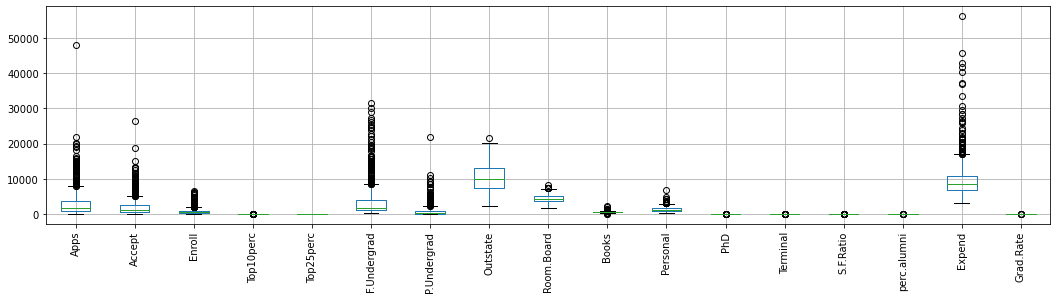

In [124]:
# Question 4
df1.boxplot(figsize=(18,4))
plt.xticks(rotation=90)
plt.show()

In [125]:
#We can see that there are outliers present.

In [126]:
#Question 5
from sklearn.decomposition import PCA 


PCA = PCA(n_components=17, random_state=123)
PCA_T= PCA.fit_transform(dfc_num_scaled)

In [127]:
PCA.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [128]:
pca.components_ 

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [129]:
#Question 6 

from sklearn.decomposition import PCA
pca = PCA(n_components=7, random_state=123) 
df_pca = pca.fit_transform(dfc_num_scaled)
df_pca.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [-7.43975398e-01,  1.05999660e+00, -3.69613274e-01, ...,
        -5.16021118e-01, -9.47754745e-01, -1.13217594e+00],
       [-2.98306081e-01, -1.77137309e-01, -9.60591689e-01, ...,
         4.68014248e-01, -2.06993738e+00,  8.39893087e-01],
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00]])

In [130]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871])

In [131]:

df_ = pd.DataFrame(pca.components_.T, columns = ['C1','C2','C3','C4','C5','C6','C7'], index = dfc_num_scaled.columns)
df_

,C1,C2,C3,C4,C5,C6,C7
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692


In [132]:
##Question 7
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [133]:
##Question 8 
np.cumsum(pca.explained_variance_ratio_)


array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726])

In [134]:
##Question 9
var = np.cumsum(np.round(pca.explained_variance_ratio_,3))*100
var

## The cumulative percentage gives the percentage of differences represented by elements N . For eg and the cumulative percentage of the second element is the total percentage of differences for elements I and II. It helps to determine the number of components by selecting the components that explain the large variation.

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6, 85.2])